<a href="https://colab.research.google.com/github/NophaieViscente/colab/blob/main/Analisando_Dados_da_Educa%C3%A7%C3%A3o_ENEM_SC_Microrregi%C3%A3o_Serrana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando as bibliotecas 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados do ENEM2019 já filtrado por estado. 
dadosSC = pd.read_csv('/content/drive/MyDrive/microdados_enem_SC_2019.csv')
dadosSC.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001010172,2019,4208203,Itajaí,42,SC,17,M,1,3,1,1501402.0,Belém,15.0,PA,2,0,2,NaN,0,15034399.0,1500800.0,Ananindeua,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,B,A,3,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A
1,190001014955,2019,4209102,Joinville,42,SC,20,F,1,1,1,1501402.0,Belém,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,A,F,5,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
2,190001041509,2019,4211306,Navegantes,42,SC,18,F,1,3,1,1501402.0,Belém,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,A,C,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
3,190001063779,2019,4200606,Águas Mornas,42,SC,22,F,1,5,1,1501402.0,Belém,15.0,PA,2,0,2,NaN,0,42006155.0,4215703.0,Santo Amaro da Imperatriz,42.0,SC,3.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,F,C,D,3,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,B,B,A,A,B
4,190001089889,2019,4205407,Florianópolis,42,SC,21,F,1,2,1,1100130.0,Machadinho D'Oeste,11.0,RO,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,F,B,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A


In [5]:
# Criando lista com o nome das cidades . 
regiao_serrana = ['Abdon Batista','Brunópolis','Campos Novos','Curitibanos','Frei Rogério','Monte Carlo',
'Ponte Alta','Ponte Alta do Norte','Santa Cecília','São Cristóvão do Sul','Vargem','Zortéa']

In [7]:
# Criando novo dataset somente com as cidades da microrregião serrana
dados_regiao_serrana = pd.DataFrame() 
for cidade in regiao_serrana :
  dados_regiao_serrana = dados_regiao_serrana.append(dadosSC[dadosSC['NO_MUNICIPIO_RESIDENCIA'] == cidade])
dados_regiao_serrana

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2133,190001688639,2019,4200051,Abdon Batista,42,SC,24,F,1,1,1,4203600.0,Campos Novos,42.0,SC,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B,A,A,3,D,A,B,D,A,B,B,B,A,A,A,A,A,B,A,A,B,A,A,A
26543,190002670399,2019,4200051,Abdon Batista,42,SC,16,F,1,1,2,NaN,NaN,NaN,NaN,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AEBAABACABDCDAEABAACDCBCADDC*ACCADCBCADDECECB,99999DBEBEECBACDAEEDADEECBBBEEBCADBAEBDAADEBEA...,EECCAACABAEBEABBCACAACBBAAEBBCDCDEBBCCCAACBBA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,120.0,100.0,100.0,60.0,520.0,E,E,A,B,5,C,A,B,C,B,A,B,B,B,A,A,A,A,B,A,A,D,A,A,A
35657,190003370606,2019,4200051,Abdon Batista,42,SC,17,F,1,1,1,4200051.0,Abdon Batista,42.0,SC,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CACABDBDBDABCCABCCBCCEBCDCEAABEDBECCABBACCBDE,99999EACAEEECAABEEEBBCECBBAEEBEBACDAAECECCBDDA...,CCCCBDDBCBCBACCBCABCCBCCACACCDCCBBDBAACCBBCBB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,120.0,0.0,480.0,C,G,C,D,4,G,A,C,D,B,B,B,C,B,A,B,A,B,D,A,B,E,A,B,B
43920,190003701842,2019,4200051,Abdon Batista,42,SC,18,F,1,1,1,4200051.0,Abdon Batista,42.0,SC,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACBCEEDCABACEBBABDABEECCCABDACABADCBCEDBCAECA,EBBAE99999EACECDEDCBAACDEEBEDECEDBADDCBAADCACC...,AABCDDEDBBAECECBABADBBEDDECCCDEACDCAADECDDBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,80.0,560.0,D,C,A,A,3,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,C,A,B,B
47546,190003836214,2019,4200051,Abdon Batista,42,SC,17,F,1,1,1,4200051.0,Abdon Batista,42.0,SC,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEDCCEDBBAAEABABDCABEADDEBEAECCACABCBCDAABCCB,99999EDAECABBCBAEACECBDBEDAADCECDCAEEECEBEEBCD...,ACCDDCCCABCBBDEBDBEABDCCBBDEBABCEBADBCEBDDDCB,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,120.0,120.0,140.0,40.0,560.0,E,E,F,F,4,E,A,C,D,B,A,B,B,B,A,B,A,A,C,B,A,D,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102561,190005915255,2019,4219853,Zortéa,42,SC,20,F,0,1,1,4204004.0,Catanduvas,42

Text(0.5, 1.0, 'Quantidade de candidatos ENEM SC 2019 por declaração racial - Microrregião Serrana')

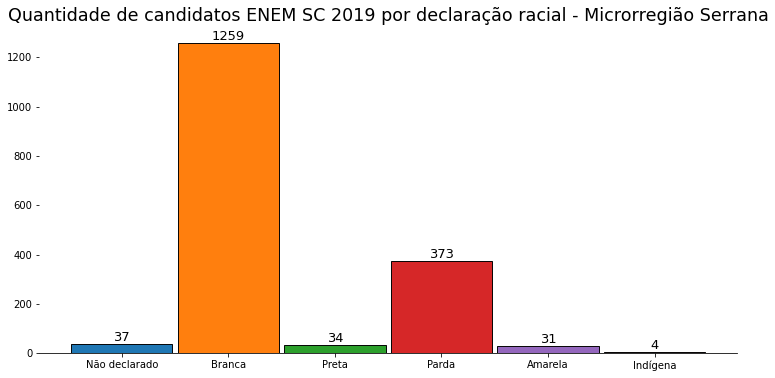

In [8]:
# Filtrando os candidatos por declaração de raça.
participantes_por_Raca = dados_regiao_serrana['TP_COR_RACA'].value_counts().sort_index()
# Criando dicionário para a substituição dos números pela categoria . 
dicionarioRacas = {0 : 'Não declarado', 1 : 'Branca',2 : 'Preta', 3 :'Parda',4:'Amarela',5:'Indígena'}
# Construindo o gráfico
fig, ax = plt.subplots(figsize=(12.5,6))
# Retirando as linhas de borda . 
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
# Capturando o indice para ser substituído por uma categoria;
# Capturando valor para alocar em cima das barras do gráfico. 
for indice, valor in enumerate(participantes_por_Raca) :
  indice = dicionarioRacas[indice]
  fig = plt.bar(indice,valor,width=0.95,edgecolor='black',linewidth=0.95)
  ax.text(x=indice ,y=valor, s=valor ,horizontalalignment='center',
          verticalalignment='bottom',fontsize=13)
plt.title('Quantidade de candidatos ENEM SC 2019 por declaração racial - Microrregião Serrana',fontdict={'fontsize': 17.5})

In [9]:
#Capturando os dados das notas das provas e colocando em uma variável chamada provas
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
# Atribuindo a soma das notas das provas de cada candidato da amostra e adicionando mais uma coluna ao dataframe 'dados_regiao_serrana' com a nota total de cada candidato.
dados_regiao_serrana['NU_NOTA_TOTAL'] = dados_regiao_serrana[provas].sum(axis=1)
# Alocando em um novo dataset sem as notas zero 
dados_rs_sem_nota_zero = dados_regiao_serrana.query('NU_NOTA_TOTAL > 0')
dados_rs_sem_nota_zero

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
26543,190002670399,2019,4200051,Abdon Batista,42,SC,16,F,1,1,2,NaN,NaN,NaN,NaN,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999DBEBEECBACDAEEDADEECBBBEEBCADBAEBDAADEBEA...,EECCAACABAEBEABBCACAACBBAAEBBCDCDEBBCCCAACBBA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,120.0,100.0,100.0,60.0,520.0,E,E,A,B,5,C,A,B,C,B,A,B,B,B,A,A,A,A,B,A,A,D,A,A,A,2242.4
35657,190003370606,2019,4200051,Abdon Batista,42,SC,17,F,1,1,1,4200051.0,Abdon Batista,42.0,SC,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999EACAEEECAABEEEBBCECBBAEEBEBACDAAECECCBDDA...,CCCCBDDBCBCBACCBCABCCBCCACACCDCCBBDBAACCBBCBB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,120.0,0.0,480.0,C,G,C,D,4,G,A,C,D,B,B,B,C,B,A,B,A,B,D,A,B,E,A,B,B,2166.5
43920,190003701842,2019,4200051,Abdon Batista,42,SC,18,F,1,1,1,4200051.0,Abdon Batista,42.0,SC,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBBAE99999EACECDEDCBAACDEEBEDECEDBADDCBAADCACC...,AABCDDEDBBAECECBABADBBEDDECCCDEACDCAADECDDBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,80.0,560.0,D,C,A,A,3,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,C,A,B,B,2882.3
47546,190003836214,2019,4200051,Abdon Batista,42,SC,17,F,1,1,1,4200051.0,Abdon Batista,42.0,SC,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999EDAECABBCBAEACECBDBEDAADCECDCAEEECEBEEBCD...,ACCDDCCCABCBBDEBDBEABDCCBBDEBABCEBADBCEBDDDCB,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,120.0,120.0,140.0,40.0,560.0,E,E,F,F,4,E,A,C,D,B,A,B,B,B,A,B,A,A,C,B,A,D,B,B,B,2608.8
47832,190003836503,2019,4200051,Abdon Batista,42,SC,18,F,1,1,1,4200051.0,Abdon Batista,42.0,SC,2,0,2,1.0,0,42044553.0,4200051.0,Abdon Batista,42.0,SC,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ACCDABABBCAEBEBDACDAEECCEBBDDBEDBEACECECA...,CABDBCEABDACEBECAACABDBCEAEABEDCADCADCBBECDEB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,120.0,120.0,120.0,100.0,560.0,D,E,D,C,5,C,A,C,D,B,A,B,B,B,A,B,A,A,C,A,B,B,A,A,B,2682.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Text(0.5, 1.0, 'Nota Total por Quantidade de Candidatos')

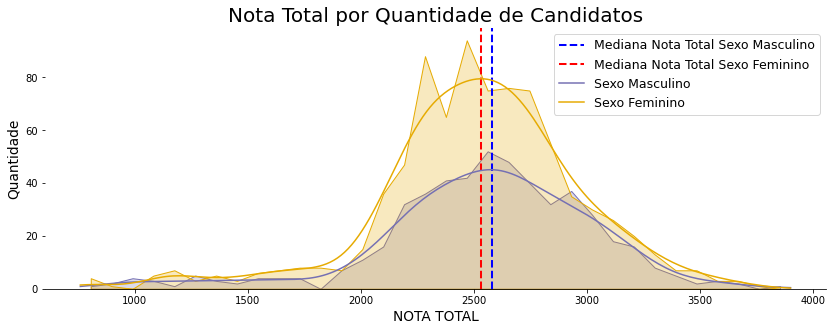

In [40]:
# Criando dicionário para personalizar fontes
dicionarioFonte = {'fontsize':13.7}
# Gerando a figura e os eixos .
fig2 , ax2 = plt.subplots(figsize=(14,4.8))
# Eliminando as bordas do gráfico
for axis in ['top', 'right', 'left']:
   ax2.spines[axis].set_color(None)
# Renomeando os 'labels' dos eixos.
plt.xlabel('NOTA TOTAL',fontdict=dicionarioFonte)
plt.ylabel('Quantidade',fontdict=dicionarioFonte)
# Fazendo o cálculo da mediana para traças a linha vertical
mediana_masculino = dados_rs_sem_nota_zero.query('TP_SEXO == "M"')['NU_NOTA_TOTAL'].median()
mediana_feminino = dados_rs_sem_nota_zero.query('TP_SEXO == "F"')['NU_NOTA_TOTAL'].median()
# Traçando a linha vertical para as medianas .
plt.axvline(mediana_masculino,ls='--',color='blue',lw=2.025)
plt.axvline(mediana_feminino,ls='--',color='red',lw=2.025)
# Plotando o gráfico . 
sns.histplot(dados_rs_sem_nota_zero,x = 'NU_NOTA_TOTAL',hue='TP_SEXO',kde=True,element='poly',
             palette='Dark2_r',stat='count')
# Escrevendo a legenda . 
plt.legend(['Mediana Nota Total Sexo Masculino','Mediana Nota Total Sexo Feminino','Sexo Masculino','Sexo Feminino'],
           fontsize=12.5,loc='best')
# Colocando o título no gráfico. 
plt.title('Nota Total por Quantidade de Candidatos',fontdict={'fontsize': 20})